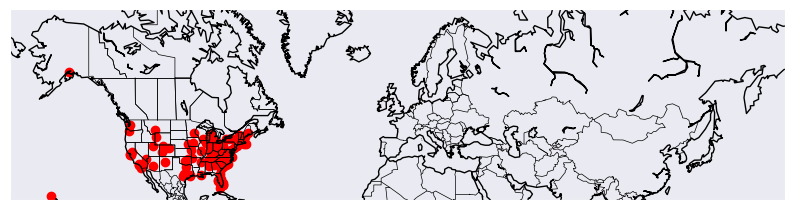

In [3]:
import pandas as pd

# Assuming the CSV files have been read into DataFrames with the same name as in R
airlines = pd.read_csv('data/airlines.csv')
airports = pd.read_csv('data/airports.csv')
planes = pd.read_csv('data/planes.csv')
weather = pd.read_csv('data/weather.csv')
flights = pd.read_csv('data/flights.csv')

# 20.2.2
# Count occurrences of tailnum in planes and filter where n > 1
planes.groupby('tailnum').size().reset_index(name='n').query('n > 1')

# Count occurrences of time_hour and origin in weather and filter where n > 1
weather.groupby(['time_hour', 'origin']).size().reset_index(name='n').query('n > 1')

# Filter rows in planes where tailnum is NA
planes[planes['tailnum'].isna()]

# Filter rows in weather where time_hour or origin is NA
weather[weather['time_hour'].isna() | weather['origin'].isna()]

# Count occurrences of time_hour, carrier, and flight in flights and filter where n > 1
flights.groupby(['time_hour', 'carrier', 'flight']).size().reset_index(name='n').query('n > 1')

# Count occurrences of alt and lat in airports and filter where n > 1
airports.groupby(['alt', 'lat']).size().reset_index(name='n').query('n > 1')

# Add a new column 'id' to flights
flights2 = flights.copy()
flights2.insert(0, 'id', range(1, len(flights2) + 1))

# Perform left joins on flights2 with various DataFrames
flights2.merge(airlines, how='left')
flights2.merge(weather[['origin', 'time_hour', 'temp', 'wind_speed']], how='left', on=['origin', 'time_hour'])
flights2.merge(planes[['tailnum', 'type', 'engines', 'seats']], how='left', on='tailnum')

# Filter flights2 for a specific tailnum and then join
flights2[flights2['tailnum'] == "N3ALAA"].merge(planes[['tailnum', 'type', 'engines', 'seats']], how='left', on='tailnum')

# Left joins without specifying columns will join on columns with the same names
flights2.merge(planes, how='left')
flights2.merge(planes, how='left', on='tailnum')
flights2.merge(airports, how='left', left_on='dest', right_on='faa')
flights2.merge(airports, how='left', left_on='origin', right_on='faa')

# Semi-joins can be simulated with inner joins and distinct
airports.merge(flights2[['origin']].drop_duplicates(), how='inner', left_on='faa', right_on='origin')
airports.merge(flights2[['dest']].drop_duplicates(), how='inner', left_on='faa', right_on='dest')

# Anti-joins can be simulated by a left join and filtering for NaN
flights2.merge(airports[['faa']], how='left', left_on='dest', right_on='faa').loc[lambda x: x['faa'].isna(), 'dest'].drop_duplicates()
flights2.merge(planes[['tailnum']], how='left', on='tailnum').loc[lambda x: x['tailnum'].isna(), 'tailnum'].drop_duplicates()

# Count and sort by dest, then take the top 10
top_dest = flights2['dest'].value_counts().head(10)

# Plotting is done using matplotlib, which is similar to ggplot in R
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Select the relevant airports after semi-joining with flights
relevant_airports = airports.merge(flights[['dest']].drop_duplicates(), how='inner', left_on='faa', right_on='dest')

# Create a basic map plot
plt.figure(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlat=airports['lat'].min(), urcrnrlat=airports['lat'].max(),
            llcrnrlon=airports['lon'].min(), urcrnrlon=airports['lon'].max(), lat_ts=20, resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
x, y = m(relevant_airports['lon'].values, relevant_airports['lat'].values)
m.scatter(x, y, marker='o', color='red')

plt.show()


In [5]:
import pandas as pd

# Read the CSV file into a DataFrame
babynames = pd.read_csv('data/babynames.csv')

# Create DataFrames similar to the tribble() function in R
x = pd.DataFrame({
    'key': [1, 2, 3],
    'val_x': ['x1', 'x2', 'x3']
})

y = pd.DataFrame({
    'key': [1, 2, 4],
    'val_y': ['y1', 'y2', 'y3']
})

df1 = pd.DataFrame({
    'key': [1, 2, 2],
    'val_x': ['x1', 'x2', 'x3']
})

df2 = pd.DataFrame({
    'key': [1, 2, 2],
    'val_y': ['y1', 'y2', 'y3']
})

# Perform an inner join
inner_joined_df = df1.merge(df2, on='key')

# Perform a left join with a flag to keep both key columns
left_joined_x = x.merge(y, on='key', how='left', indicator=True)

# Cross join
df = pd.DataFrame({
    'name': ['John', 'Simon', 'Tracy', 'Max']
})

cross_joined_df = df.merge(df, how='cross')

# Full joins
full_joined_xy = x.merge(y, on='key', how='outer')

# Full join with a flag to keep both key columns
full_joined_xy_keep = x.merge(y, on='key', how='outer', indicator=True)

left_joined_x

,key,val_x,val_y,_merge
0,1,x1,y1,both
1,2,x2,y2,both
2,3,x3,NaN,left_only


In [6]:
import pandas as pd

# Create the DataFrame
df = pd.DataFrame({'id': [1, 2, 3, 4], 'name': ["John", "Simon", "Tracy", "Max"]})

# Perform a cross join
df_cross = df.assign(key=1).merge(df.assign(key=1), on='key').drop('key', axis=1)

# Filter based on the condition (id from the left table < id from the right table)
df_filtered = df_cross[df_cross['id_x'] < df_cross['id_y']]

# The resulting DataFrame 'df_filtered' is equivalent to the left join with the condition id < id in R
df_filtered

,id_x,name_x,id_y,name_y
1,1,John,2,Simon
2,1,John,3,Tracy
3,1,John,4,Max
6,2,Simon,3,Tracy
7,2,Simon,4,Max
11,3,Tracy,4,Max


In [8]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
babynames = pd.read_csv('data/babynames.csv')

# Create the 'parties' DataFrame
parties = pd.DataFrame({
    'q': [1, 2, 3, 4],
    'party': pd.to_datetime(["2022-01-10", "2022-04-04", "2022-07-11", "2022-10-03"])
})

# Sample 100 names from babynames DataFrame without replacement
# If the babynames DataFrame has less than 100 names, replace=True can be used to allow sampling with replacement
employee_names = babynames['name'].sample(100, replace=False, random_state=1)

# Generate 100 random birthdays within the year 2022
rng = np.random.default_rng(seed=1)  # Random number generator with a seed for reproducibility
random_days = rng.choice(pd.date_range(start="2022-01-01", end="2022-12-31", freq='D'), size=100, replace=True)

employees = pd.DataFrame({
    'name': employee_names.values,
    'birthday': random_days
})

# Define a custom function to perform a join based on the closest 'party' date that is greater than or equal to 'birthday'
def closest_join(left, right, left_on, right_on):
    # Ensure the right DataFrame is sorted by the key
    right = right.sort_values(right_on)
    # Find the indexes of the closest dates
    closest_idxs = right[right_on].searchsorted(left[left_on], side='right') - 1
    # Ensure we don't go out of bounds
    closest_idxs[closest_idxs == len(right)] = len(right) - 1
    # Perform the join using the closest_idxs
    left['closest_idx'] = closest_idxs
    joined = pd.merge(left, right.reset_index(), left_on='closest_idx', right_index=True, how='left')
    # Drop the temporary 'closest_idx' column
    joined = joined.drop(columns='closest_idx')
    return joined

# Perform the closest join operation
employees_closest_join = closest_join(employees, parties, 'birthday', 'party')

# Define a function for an anti-join
def anti_join(left, right, on):
    return left[~left[on].isin(right[on])]

# Perform the anti join operation
employees_anti_join = anti_join(employees, employees_closest_join, 'name')

# Now we will create a new 'parties' DataFrame with start and end dates for a hypothetical event
# parties = pd.DataFrame({
#     'q': [1, 2, 3, 4],
#     'party': pd.to_datetime(["2022-01-10", "2022-04-04", "2022-07-11", "2022-10-03"]),
#     'start': pd.to_datetime(["2022-01-01", "2022-04-04", "2022-07-11", "2022-10-03"]),
#     'end': pd.to_datetime(["2022-04-03", "2022-07-11", "2022-10-02", "2022-12


In [10]:
import pandas as pd

# Create the parties DataFrame
parties = pd.DataFrame({
    'q': [1, 2, 3, 4],
    'party': pd.to_datetime(["2022-01-10", "2022-04-04", "2022-07-11", "2022-10-03"]),
    'start': pd.to_datetime(["2022-01-01", "2022-04-04", "2022-07-11", "2022-10-03"]),
    'end': pd.to_datetime(["2022-04-03", "2022-07-10", "2022-10-02", "2022-12-31"])
})

# Assuming employees DataFrame is already defined
# employees = ...

# Perform a cross join
employees_cross_joined = employees.assign(key=1).merge(parties.assign(key=1), on='key').drop('key', 1)

# Filter based on the condition (birthday between start and end)
matched_employees = employees_cross_joined[
    (employees_cross_joined['birthday'] >= employees_cross_joined['start']) &
    (employees_cross_joined['birthday'] <= employees_cross_joined['end'])
]

# Check if there are employees without a match and raise an error if so
if len(matched_employees) < len(employees):
    raise ValueError("Some employees do not have a matching party based on their birthday.")

# The resulting DataFrame 'matched_employees' contains only the rows where 'birthday' is between 'start' and 'end'
matched_employees

/var/folders/fw/m5f2ykhd1yzc0yxvp3g1vy180000gp/T/ipykernel_12053/2604294798.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  employees_cross_joined = employees.assign(key=1).merge(parties.assign(key=1), on='key').drop('key', 1)


,name,birthday,closest_idx,q,party,start,end
1,Konstance,2022-06-22,1,2,2022-04-04,2022-04-04,2022-07-10
5,Kaylyn,2022-07-06,1,2,2022-04-04,2022-04-04,2022-07-10
11,Annalie,2022-10-03,3,4,2022-10-03,2022-10-03,2022-12-31
15,Rayna,2022-12-13,3,4,2022-10-03,2022-10-03,2022-12-31
16,Loleta,2022-01-13,0,1,2022-01-10,2022-01-01,2022-04-03
...,...,...,...,...,...,...,...
382,Winnie,2022-10-02,2,3,2022-07-11,2022-07-11,2022-10-02
384,Auburn,2022-01-20,0,1,2022-01-10,2022-01-01,2022-04-03
388,Josemiguel,2022-02-23,0,1,2022-01-10,2022-01-01,2022-04-03
394,Zackery,2022-07-18,2,3,2022-07-11,2022-07-11,2022-10-02


In [12]:
import pandas as pd

# Perform a full outer join
full_outer_joined_df = x.merge(y, on='key', how='outer')
# Perform a full outer join and keep all columns from both DataFrames
# pandas automatically adds a suffix to overlapping column names
full_outer_joined_df_keep = x.merge(y, on='key', how='outer', suffixes=('_x', '_y'))

In [13]:
full_outer_joined_df

,key,val_x,val_y
0,1,x1,y1
1,2,x2,y2
2,3,x3,NaN
3,4,NaN,y3
